# CSCI 39543 Project: Reviews Sentiment Analysis


## 1. Collecting Data

### 1.1 Dataset Title: 

    amazon_reviews Data_Set
    
### 1.2 Dataset Source: 
    Amazon AWS 
    https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt
    
### 1.3 Dataset Description:
    
    This dataset contains close to 7M consumer reviews on different products. This data can be used to improve customer experience, optimize product offerings, and identify areas of improvement. The data includes customer reviews, ratings, and other related information. It can also include if the purchase is verified, review date, and other related data.

### 1.4 Project Objective:
    The objective of this project is to find various trends and patterns and create useful insights for the best quality product. We must determine whether the review is favorable or unfavorable. A grade of four or five might be seen as a positive review, one or two as a negative review, and three as neutral.

## 2. Exploratory Data Analysis (EDA):

### 2.1 Data:

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('amazon_reviews.csv')  

In [3]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4,0,1,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4,0,0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,US,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5,1,2,N,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,US,53096335,R3R9VTJ82FXECQ,0425132153,624269601,Good Omens,Books,5,0,0,N,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,US,51747709,R1P5J3FNBWTFXY,0517122707,161411385,A Confederacy of Dunces,Books,5,0,0,N,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931161,US,52303,R16DAHIWNXFOYI,B00QW8TYWO,828652896,Crossy Road,Mobile_Apps,5,0,0,N,Y,Five Stars,very fun game,2015-08-31
6931162,US,565563,R1DS6EBGAEJDB5,B00PSLQYWE,156264553,Downton Abbey Season 5,Digital_Video_Download,5,0,0,N,Y,Five Stars,Great,2015-08-31
6931163,US,254421,R3HEHT8JUA33VW,B000FC1LOC,354573823,My Sister's Keeper: A Novel (Wsp Readers Club),Digital_Ebook_Purchase,5,0,0,N,N,and she has beautifully written and explored t...,"This is my first book from Jodi, and she has b...",2015-08-31
6931164,US,146004,RVK4I33L93536,B008T4HHWS,599809487,Scent of a Woman,Digital_Video_Download,5,0,0,N,N,Like this!,Good movie!,2015-08-31


In [4]:
df.shape

(6931166, 15)

In [5]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931166 entries, 0 to 6931165
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 793.2+ MB


### 2.2 Preprocessing the Data
  Dropping unwanted features, converting the review_date type from object to datetime, removing duplicated values, and null values.

In [7]:
# droping unwanted features 
df = df.drop(['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 
              'vine', 'verified_purchase', 'helpful_votes', 'total_votes', ], axis=1)

In [8]:
# converting review_date type from object to date_time
df['review_date'] = pd.to_datetime(df['review_date'])

In [9]:
df

,product_category,star_rating,review_headline,review_body,review_date
0,Books,4,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,Books,4,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,Books,5,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,Books,5,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,Books,5,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17
...,...,...,...,...,...
6931161,Mobile_Apps,5,Five Stars,very fun game,2015-08-31
6931162,Digital_Video_Download,5,Five Stars,Great,2015-08-31
6931163,Digital_Ebook_Purchase,5,and she has beautifully written and explored t...,"This is my first book from Jodi, and she has b...",2015-08-31
6931164,Digital_Video_Download,5,Like this!,Good movie!,2015-08-31


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931166 entries, 0 to 6931165
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   product_category  object        
 1   star_rating       int64         
 2   review_headline   object        
 3   review_body       object        
 4   review_date       datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 264.4+ MB


In [11]:
df.loc[df.duplicated()]

,product_category,star_rating,review_headline,review_body,review_date
15974,Music,5,Cult Worship,"The first time I heard Electric, I was a fresh...",1999-02-06
20525,Music,1,Buy Her Second Album Instead!,This is awful! Please turn it off! Get a voice...,1999-04-02
24886,Video DVD,1,Very disappointed.,"Of all the billions, I am shocked that they ha...",1999-05-21
29716,Music,5,Simply an excellent CD,One of my all time top ten albums. Almost all...,1999-07-08
29718,Music,5,Simply an excellent CD,One of my all time top ten albums. Almost all...,1999-07-08
...,...,...,...,...,...
6931089,Mobile_Apps,5,Five Stars,Love it,2015-08-31
6931095,Digital_Video_Download,5,Five Stars,love it,2015-08-31
6931127,Digital_Video_Download,5,Five Stars,Loved it!,2015-08-31
6931150,Digital_Video_Download,5,Five Stars,Great,2015-08-31


In [12]:
# dropping duplicated values
df = df.drop_duplicates()

In [13]:
df.loc[df.duplicated()]

,product_category,star_rating,review_headline,review_body,review_date


In [14]:
df.isnull().sum()

product_category     0
star_rating          0
review_headline     70
review_body         74
review_date          0
dtype: int64

In [15]:
# Removing null values
df = df.dropna()

In [16]:
df.isnull().sum()

product_category    0
star_rating         0
review_headline     0
review_body         0
review_date         0
dtype: int64

In [17]:
df.shape

(6785736, 5)

### 2.3 Data Visualization: 

<AxesSubplot:title={'center':'Count of reviews by date'}, xlabel='Year', ylabel='Count'>

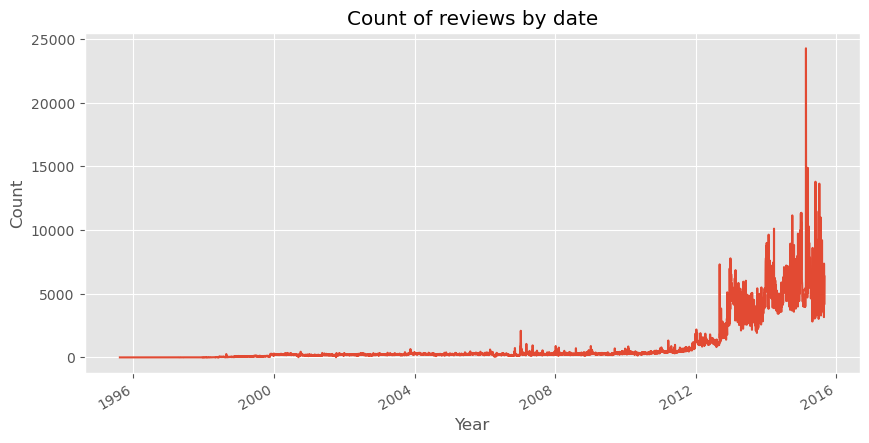

In [18]:
df['review_date'].value_counts().sort_index().plot(title='Count of reviews by date',
                                                   figsize=(10,5),
                                                   xlabel = 'Year',
                                                   ylabel = 'Count')

<AxesSubplot:title={'center':'Count of product_category'}>

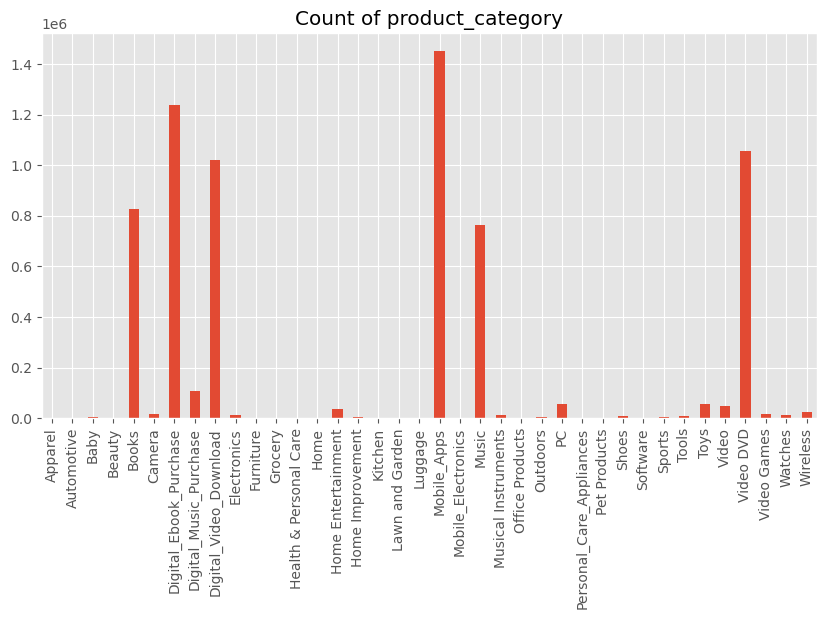

In [19]:
df['product_category'].value_counts().sort_index().plot(kind ='bar', 
                                                       title ='Count of product_category', 
                                                       figsize =(10,5))

<AxesSubplot:title={'center':'Count of product_category'}, ylabel='product_category'>

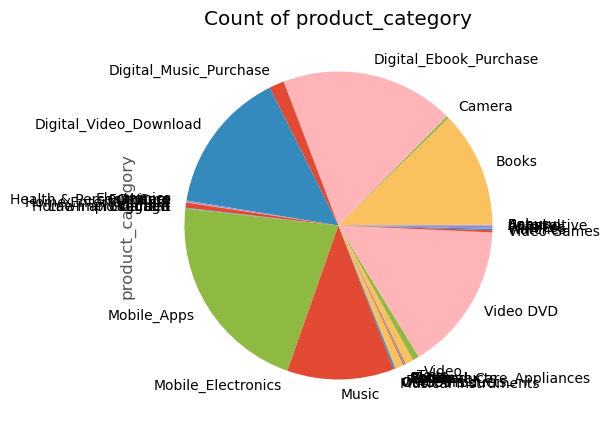

In [20]:
df['product_category'].value_counts().sort_index().plot(kind ='pie', 
                                                       title ='Count of product_category', 
                                                       figsize =(10,5))

In [21]:
data_counts = df['product_category'].value_counts()
data_counts

Mobile_Apps                 1449552
Digital_Ebook_Purchase      1237789
Video DVD                   1055122
Digital_Video_Download      1020265
Books                        828812
Music                        762208
Digital_Music_Purchase       106374
PC                            56945
Toys                          56806
Video                         46302
Home Entertainment            36451
Wireless                      22735
Camera                        16953
Video Games                   15457
Electronics                   11450
Musical Instruments           10952
Watches                       10543
Tools                          7505
Shoes                          7377
Baby                           5896
Sports                         4135
Home Improvement               3719
Outdoors                       3195
Office Products                2310
Home                           2007
Kitchen                        1843
Lawn and Garden                1212
Health & Personal Care      

<AxesSubplot:title={'center':'Count of reviews by stars'}, ylabel='star_rating'>

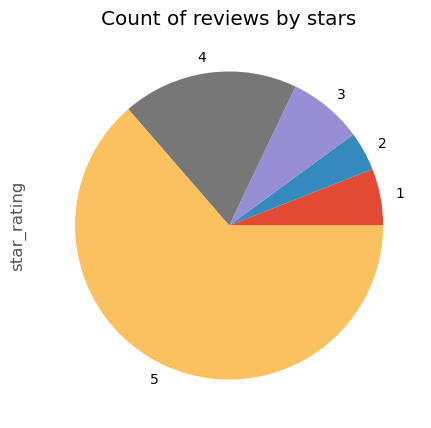

In [22]:
df['star_rating'].value_counts().sort_index().plot(kind ='pie', 
                                                       title ='Count of reviews by stars', 
                                                       figsize =(10,5))

<AxesSubplot:title={'center':'Count of reviews by stars'}, xlabel='Star Rating', ylabel='Count'>

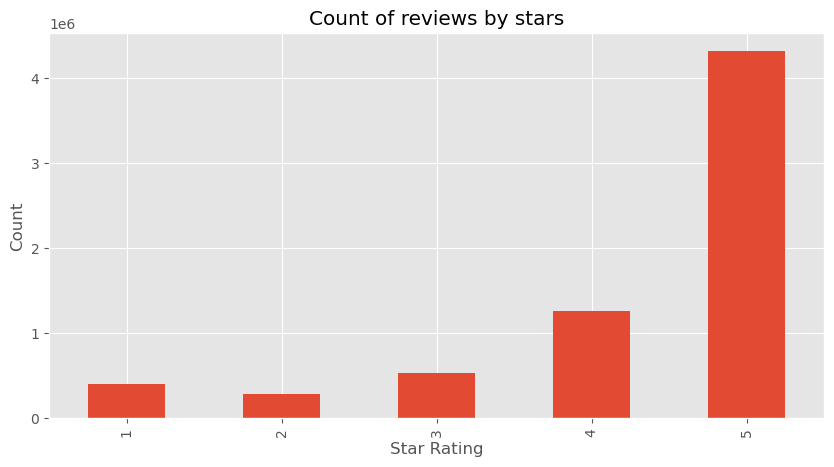

In [23]:
df['star_rating'].value_counts().sort_index().plot(kind ='bar', 
                                                       title ='Count of reviews by stars', 
                                                       figsize =(10,5),
                                                       xlabel = 'Star Rating',
                                                       ylabel = 'Count')

In [24]:
counts = df['star_rating'].value_counts()
percs = df['star_rating'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
5,4317891,63.6%
4,1252946,18.5%
3,531921,7.8%
1,404427,6.0%
2,278551,4.1%


- Based on an analysis of the plot 'Count of reviews by date', it can be inferred that the reviews are from 2014 and onwards. Consequently, there appears to be no compelling reason to adjust the date range.
- After examining the plot 'Count of product_category', it is apparent that certain product categories, like Books and Digital_Ebook_Purchase, share similarities. Consequently, in order to filter the dateset and focus on the most representative data, it is advisable to drop one of these categories from the analysis. In addition to  replacing categories that are less 1000 datapoints with a single Category 'Others'

In [25]:
# replacing categories that are less 1000 datapoints with 'Others'
drop_categories = ['Mobile_Apps', 'Digital_Video_Download','Music', 'Digital_Ebook_Purchase']
mask_categories = ~df['product_category'].isin(drop_categories)
df = df[mask_categories]

In [26]:
df['product_category'] = df['product_category'].replace(['Pet Products', 'Furniture','Personal_Care_Appliances',
                                                        'Grocery','Beauty','Software','Luggage', 'Apparel',
                                                        'Mobile_Electronics','Automotive'], 'Others')

In [27]:
df.shape

(2315922, 5)

<AxesSubplot:title={'center':'Count of product_category'}>

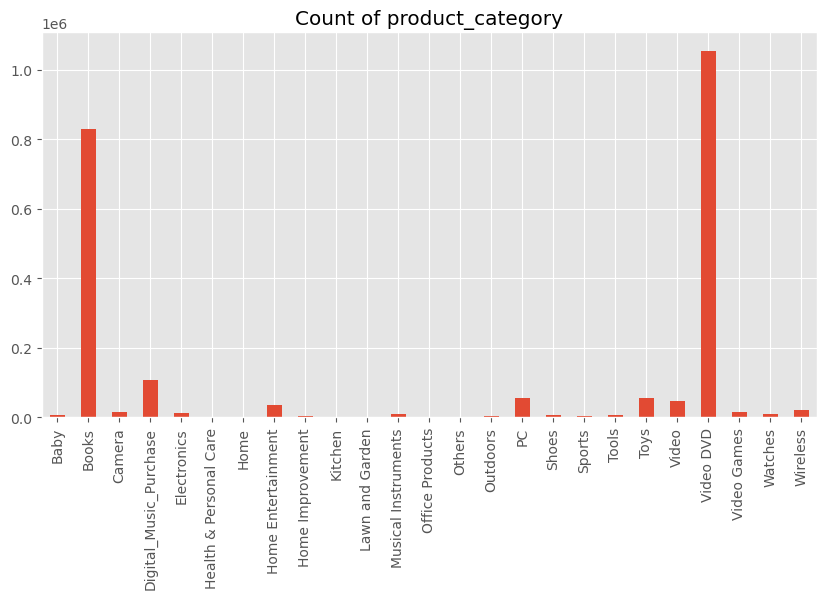

In [28]:
df['product_category'].value_counts().sort_index().plot(kind ='bar', 
                                                       title ='Count of product_category', 
                                                       figsize =(10,5))

<AxesSubplot:title={'center':'Count of product_category'}, ylabel='product_category'>

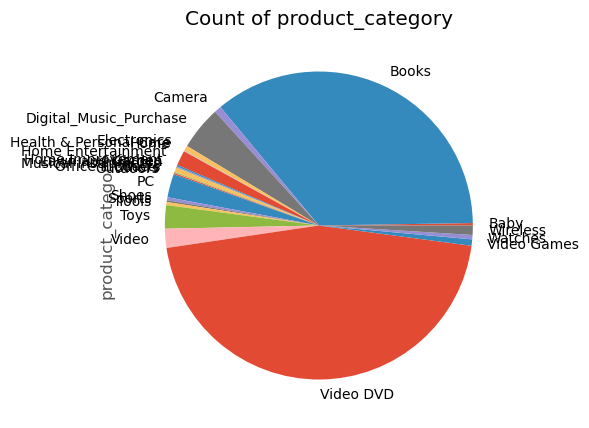

In [29]:
df['product_category'].value_counts().sort_index().plot(kind ='pie', 
                                                       title ='Count of product_category', 
                                                       figsize =(10,5))

In [30]:
data_counts = df['product_category'].value_counts()
data_counts

Video DVD                 1055122
Books                      828812
Digital_Music_Purchase     106374
PC                          56945
Toys                        56806
Video                       46302
Home Entertainment          36451
Wireless                    22735
Camera                      16953
Video Games                 15457
Electronics                 11450
Musical Instruments         10952
Watches                     10543
Tools                        7505
Shoes                        7377
Baby                         5896
Sports                       4135
Home Improvement             3719
Outdoors                     3195
Office Products              2310
Home                         2007
Kitchen                      1843
Lawn and Garden              1212
Health & Personal Care       1071
Others                        750
Name: product_category, dtype: int64

- Based on the analysis of the plot and the need to reduce the dataset size, randomly discard certain data points from the Books and Video DVD categories. By doing so, the dataset will be effectively streamlined, allowing for a more manageable and focused analysis while still maintaining the overall integrity of the data.

In [31]:
target_categories = ['Video DVD','Books']

# Create a boolean mask for the target categories
mask = df['product_category'].isin(target_categories)
# Select 85% of the reviews in the target categories to drop randomly
drop_indices = df[mask].sample(frac=0.85, random_state=42).index

# Drop the selected rows
df = df.drop(drop_indices)

<AxesSubplot:title={'center':'Count of product_category'}>

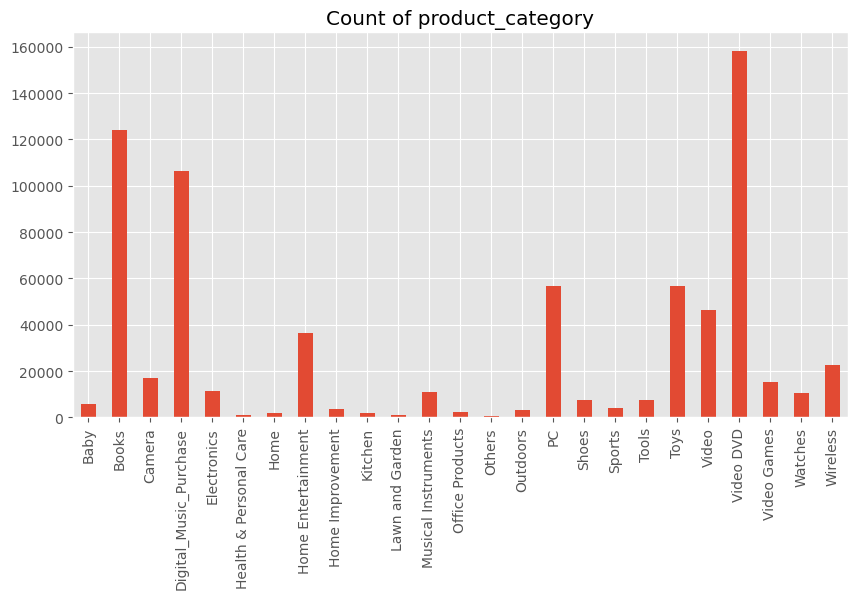

In [32]:
df['product_category'].value_counts().sort_index().plot(kind ='bar', 
                                                       title ='Count of product_category', 
                                                       figsize =(10,5))

In [33]:
date_counts = df['product_category'].value_counts()
date_counts

Video DVD                 158310
Books                     124280
Digital_Music_Purchase    106374
PC                         56945
Toys                       56806
Video                      46302
Home Entertainment         36451
Wireless                   22735
Camera                     16953
Video Games                15457
Electronics                11450
Musical Instruments        10952
Watches                    10543
Tools                       7505
Shoes                       7377
Baby                        5896
Sports                      4135
Home Improvement            3719
Outdoors                    3195
Office Products             2310
Home                        2007
Kitchen                     1843
Lawn and Garden             1212
Health & Personal Care      1071
Others                       750
Name: product_category, dtype: int64

In [34]:
df.shape

(714578, 5)

In [35]:
# displaying the star rating again
counts = df['star_rating'].value_counts()
percs = df['star_rating'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
5,472977,66.2%
4,114890,16.1%
3,50648,7.1%
1,45444,6.4%
2,30619,4.3%


- Considering the task of text mining, it can be concluded that the product_category and review_date variables are irrelevant and unnecessary for our model. These variables do not contribute significantly to the analysis of the text data and can be safely excluded without compromising the integrity or accuracy of the text mining process.

In [36]:
df = df[['review_headline','review_body', 'star_rating']]
df = df.drop_duplicates()
df = df.dropna()
df

,review_headline,review_body,star_rating
7,The Doors: The best movie ever,The Doors is one of my favorite movies. Val Ki...,5
10,A definite page turner,John Grisham's The Rainmaker keeps you guessin...,5
24,I didn't want it to end.,"I've already worn out a copy of this book, and...",5
30,Very interesting reading.,I would advise people who want to read this bo...,4
40,Treasure Island is a book to enjoy and learn from,Treasure Island was written by Robert Louis St...,5
...,...,...,...
6931105,Fun classic for solo as well as co-op play,Worthy followup to the classic game. A D&D-lit...,4
6931107,The original books were much better than this ...,The original books were much better than this ...,4
6931121,Great at first,This is my second one in the past maybe 3-4 ye...,1
6931123,Perfect for home studios,"Clean, Gets the job done! Perfect for home stu...",5


In [37]:
df.shape

(691710, 3)

### 2.4 Data Cleaning

In [38]:
# Importing necessary libraries
import re, string
import unicodedata

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [39]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove non-ASCII characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Remove punctuations and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]

    # Remove short and long tokens
    tokens = [token for token in tokens if len(token) > 2 and len(token) < 20]

    # Join tokens back into a string
    clean_text = ' '.join(tokens)

    return clean_text

In [40]:
df['review_body'] = df['review_body'].apply(clean_text)
df['review_body'].head()

7     doors one favorite movies val kilmer great act...
10    john grishams rainmaker keep guess amp keep pa...
24    ive already wear copy book write review prepar...
30    would advise people want read book take slowly...
40    treasure island write robert louis stevenson c...
Name: review_body, dtype: object

In [41]:
df['review_headline'] = df['review_headline'].apply(clean_text)
df['review_headline'].head()

7                doors best movie ever
10                definite page turner
24                      didnt want end
30                       interest read
40    treasure island book enjoy learn
Name: review_headline, dtype: object

In [42]:
# Importing necessary libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

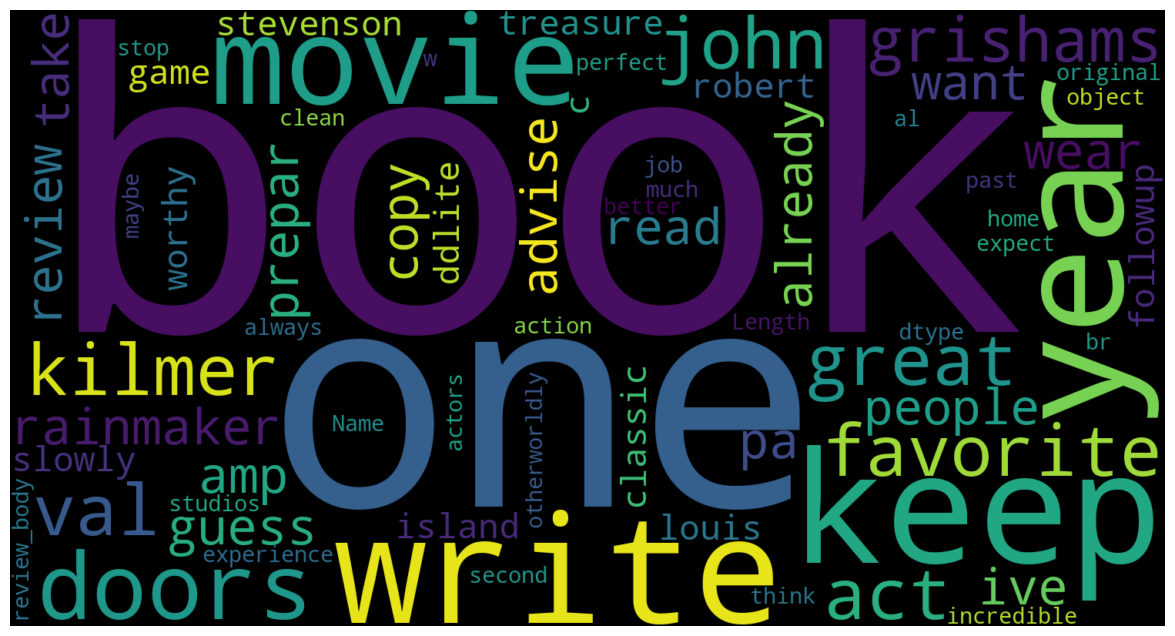

In [43]:
txt = df['review_body']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

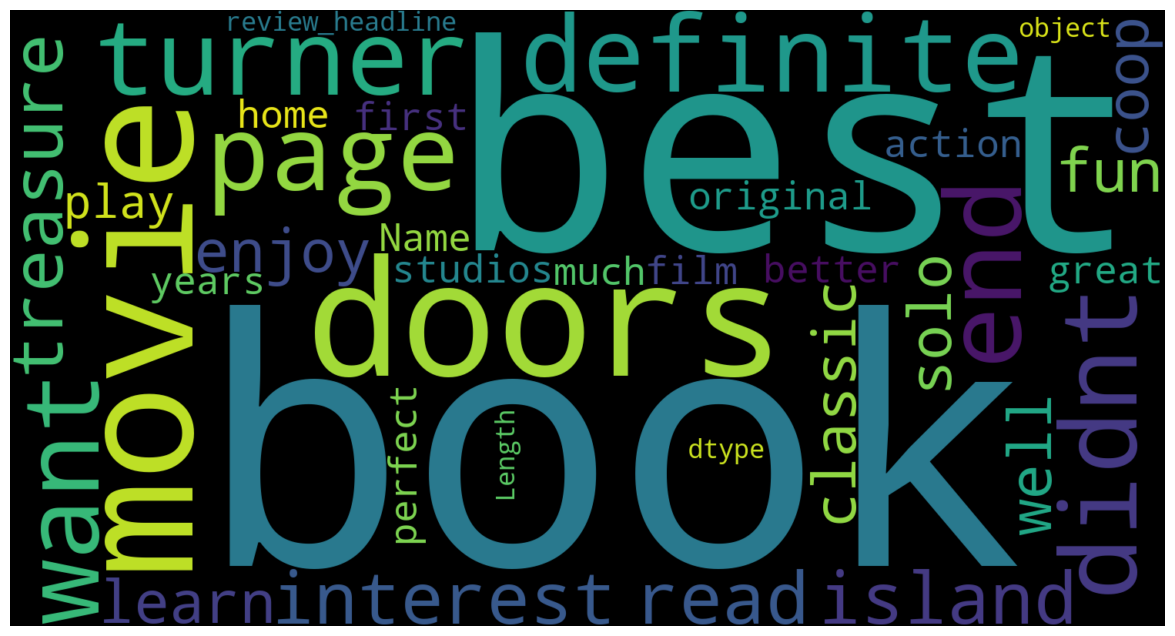

In [44]:
txt = df['review_headline']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

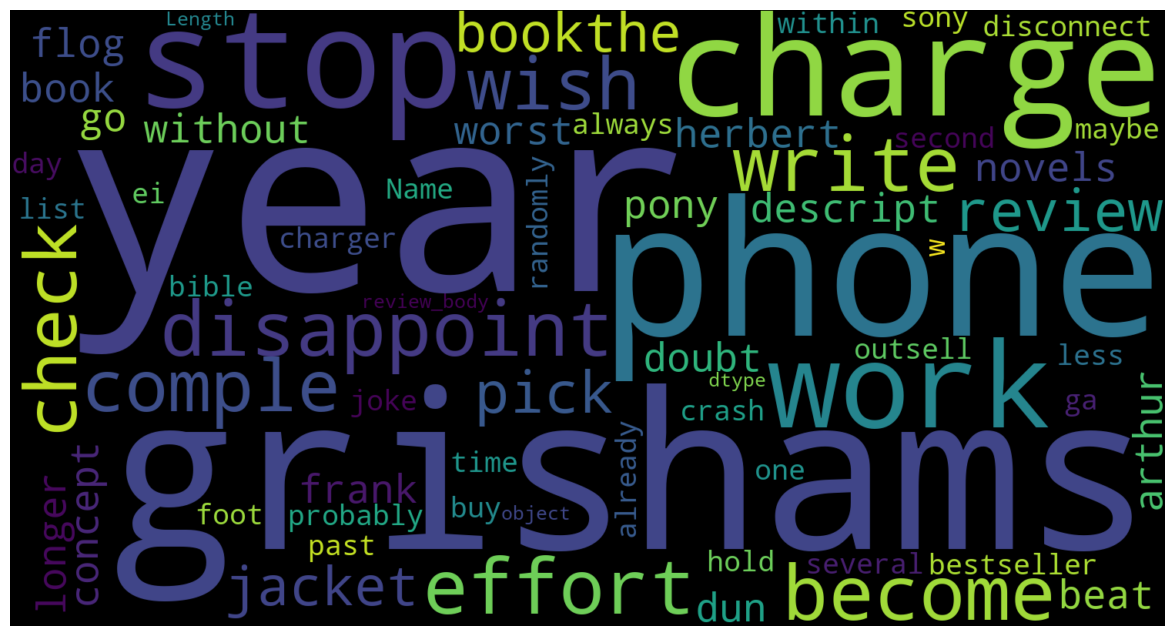

In [45]:
review_positive = df[df['star_rating']== 1]
txt = review_positive['review_body']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

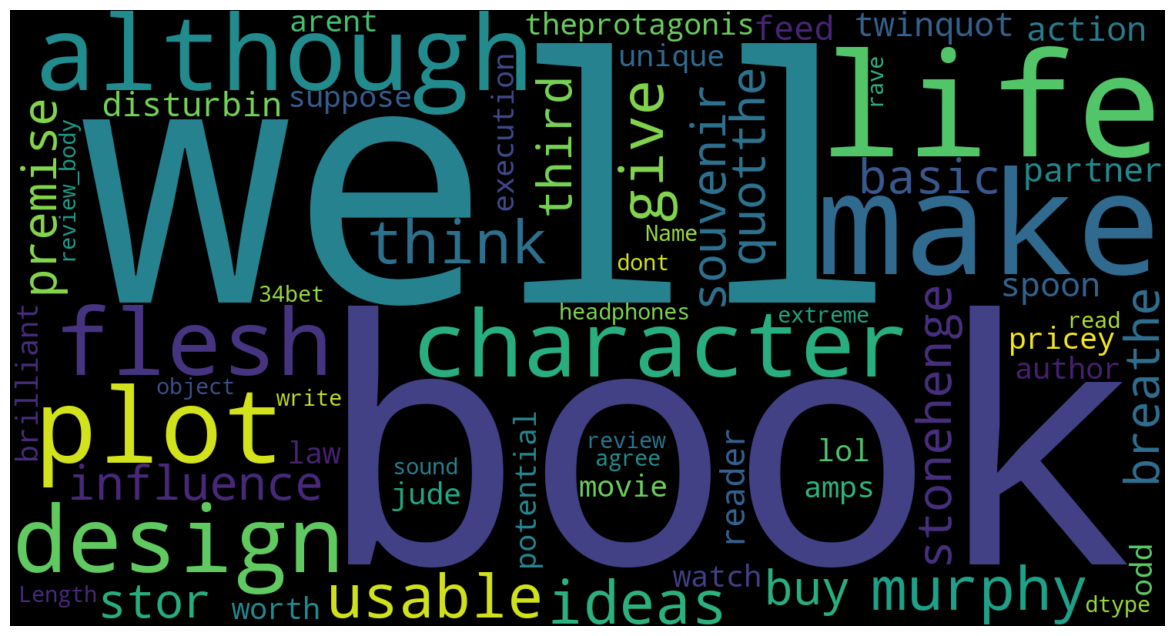

In [46]:
review_positive = df[df['star_rating']== 3]
txt = review_positive['review_body']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

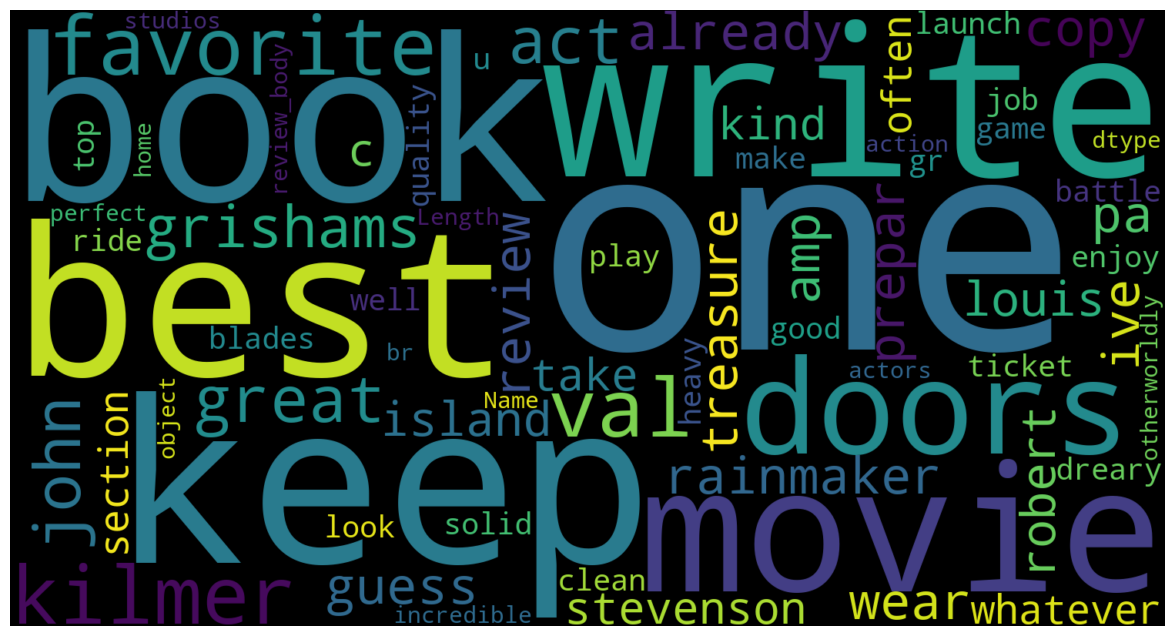

In [47]:
review_positive = df[df['star_rating']== 5]
txt = review_positive['review_body']
plt.figure(figsize=(20,8))

wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black').generate(str(txt))

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 3. Creating Baseline Model

In [48]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [49]:
df_base = df

In [50]:
x = df_base['review_body']
y = df_base['star_rating']

In [51]:
# Creating Document Term Matrix using TFIDFVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(x)
x

<691710x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 20487336 stored elements in Compressed Sparse Row format>

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

### Naive Bayes

In [53]:
df_NB = df

In [54]:
#droing 70% of data, otherwise Naive bayes doesn’t work(Doesn’t work with over 150k Datapoints)

drop_indices = df_NB.sample(frac=0.8, random_state=42).index

# Drop the selected rows
df_NB = df_NB.drop(drop_indices)

In [55]:
df_NB

,review_headline,review_body,star_rating
30,interest read,would advise people want read book take slowly...,4
45,medieval knight days brilliant overwhelm,barbara tuchmans work genre essayists 19th cen...,4
59,couldnt put,first page last grip novel keep attention marv...,5
74,fascinate tale life fascinate character,book must read fan eddings quotbelgariadquot q...,5
89,confederacy dunces wave unique flag,bad kennedy longer among live hedstill hit nig...,5
...,...,...,...
6930804,much gain expect,amps arent suppose make headphones sound 34bet...,3
6930835,nice stand,good laptop stand offer difficulty installatio...,5
6931100,five star,good quality one best look blades,5
6931102,one best battle top make solid heavy,one best battle top make solid heavy launch gr...,5


In [56]:
x_B = df_NB['review_body']
y_B = df_NB['star_rating']
# Creating Document Term Matrix using TFIDFVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x_B = vectorizer.fit_transform(x_B)
x_B
x_B_train, x_B_test, y_B_train, y_B_test = train_test_split(x_B, y_B, train_size = 0.8, random_state = 0)

In [57]:
NaiveB = GaussianNB()
NaiveB.fit(x_B_train.toarray(), y_B_train)

GaussianNB()

In [58]:
NaiveB_pred = NaiveB.predict(x_B_test.toarray())

In [59]:
accuracy_score(y_B_test, NaiveB_pred)

0.32892406664498175

In [60]:
print(classification_report(y_B_test, NaiveB_pred))

              precision    recall  f1-score   support

           1       0.13      0.55      0.21      1849
           2       0.07      0.33      0.11      1234
           3       0.13      0.17      0.15      2107
           4       0.22      0.17      0.20      4481
           5       0.84      0.36      0.51     17998

    accuracy                           0.33     27669
   macro avg       0.28      0.32      0.24     27669
weighted avg       0.60      0.33      0.39     27669



### Logistic Regression

In [61]:
logRegr = LogisticRegression()
logRegr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred = logRegr.predict(x_test)

In [63]:
accuracy_score(y_test, y_pred)

0.7071171444680574

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.55      0.56      8987
           2       0.34      0.09      0.15      6198
           3       0.37      0.17      0.23     10000
           4       0.44      0.18      0.26     22472
           5       0.76      0.95      0.85     90685

    accuracy                           0.71    138342
   macro avg       0.50      0.39      0.41    138342
weighted avg       0.65      0.71      0.66    138342



## 4. Improving The Model

- making model based on review_headline

In [65]:
v = df_base['review_headline']
w = df_base['star_rating']

In [66]:
vectorizer = TfidfVectorizer(max_features=5000)
v = vectorizer.fit_transform(v)
v

<691710x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1776681 stored elements in Compressed Sparse Row format>

In [67]:
v_train, v_test, w_train, w_test = train_test_split(v, w, train_size = 0.8, random_state = 0)

In [68]:
logRegr = LogisticRegression()
logRegr.fit(v_train, w_train)
w_pred = logRegr.predict(v_test)
accuracy_score(w_test, w_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7110060574518223

In [69]:
print(classification_report(w_test, w_pred))

              precision    recall  f1-score   support

           1       0.57      0.43      0.49      8987
           2       0.44      0.13      0.20      6198
           3       0.52      0.19      0.28     10000
           4       0.57      0.17      0.26     22472
           5       0.74      0.97      0.84     90685

    accuracy                           0.71    138342
   macro avg       0.57      0.38      0.41    138342
weighted avg       0.67      0.71      0.65    138342



- undersampling the data(based on star rating)

In [70]:
from imblearn.under_sampling import RandomUnderSampler

countss = df_base['star_rating'].value_counts()
# Determine the minimum class count
min_class_count = countss.min()

# Undersample each class to the size of the minimum class count
rus = RandomUnderSampler(sampling_strategy={cls: min_class_count for cls in counts.index}, random_state=42)
undersampled_data, undersampled_targets = rus.fit_resample(df_base.drop(columns=['star_rating']), 
                                                           df_base['star_rating'])

# Combine the undersampled data and targets into a new DataFrame
df_under_sampled = pd.concat([pd.DataFrame(undersampled_data), pd.DataFrame(undersampled_targets, 
                                                                         columns=['star_rating'])], axis=1)

In [71]:
df_under_sampled.shape

(152900, 3)

In [72]:
counts = df_under_sampled['star_rating'].value_counts()
percs = df_under_sampled['star_rating'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
1,30580,20.0%
2,30580,20.0%
3,30580,20.0%
4,30580,20.0%
5,30580,20.0%


<AxesSubplot:title={'center':'Count of reviews by stars'}, xlabel='Star Rating', ylabel='Count'>

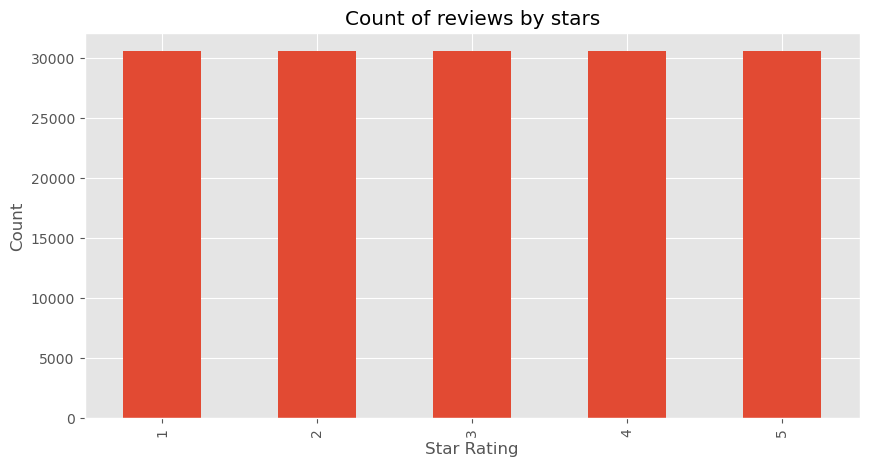

In [73]:
df_under_sampled['star_rating'].value_counts().sort_index().plot(kind ='bar', 
                                                       title ='Count of reviews by stars', 
                                                       figsize =(10,5),
                                                       xlabel = 'Star Rating',
                                                       ylabel = 'Count')

In [74]:
x = df_under_sampled['review_body']
y = df_under_sampled['star_rating']
# Creating Document Term Matrix using TFIDFVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(x)
x
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

### Naive Beys

In [75]:
NaiveB = GaussianNB()
NaiveB.fit(x_train.toarray(), y_train)

GaussianNB()

In [76]:
NaiveB_pred = NaiveB.predict(x_test.toarray())

In [77]:
accuracy_score(y_test, NaiveB_pred)

0.3616415958142577

In [78]:
print(classification_report(y_test, NaiveB_pred))

              precision    recall  f1-score   support

           1       0.41      0.55      0.47      5998
           2       0.32      0.21      0.25      6066
           3       0.30      0.19      0.24      6168
           4       0.30      0.20      0.24      6111
           5       0.39      0.65      0.49      6237

    accuracy                           0.36     30580
   macro avg       0.34      0.36      0.34     30580
weighted avg       0.34      0.36      0.34     30580



### Logistic Regression

In [79]:
logRegr = LogisticRegression()
logRegr.fit(x_train, y_train)
y_pred = logRegr.predict(x_test)
accuracy_score(y_test, y_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4772727272727273

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.62      0.58      5998
           2       0.41      0.37      0.39      6066
           3       0.39      0.36      0.37      6168
           4       0.42      0.39      0.40      6111
           5       0.59      0.64      0.62      6237

    accuracy                           0.48     30580
   macro avg       0.47      0.48      0.47     30580
weighted avg       0.47      0.48      0.47     30580



- making review_headline and review_body as one column review + undersample

In [81]:
df_ = df_under_sampled

In [82]:
df_['review'] = df_['review_headline'] + ' ' + df_['review_body']

In [83]:
df_ = df_[['review','star_rating']]

In [84]:
df_

,review,star_rating
0,withings mislead compatibility unless newest g...,1
1,great audio constantly restart appear issue de...,1
2,stick something like wiha fyi break immediatel...,1
3,one star never buy good,1
4,love movie disapointed didnt come original ca...,1
...,...,...
152895,truly amaze value sure much better truly amaze...,5
152896,one funniest movies ive ever see love sendups ...,5
152897,beautiful funny heart warm story absolutely lo...,5
152898,must see movie movie come obama ever think eve...,5


In [85]:
x = df_['review']
y = df_['star_rating']
# Creating Document Term Matrix using TFIDFVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(x)
x
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

### Naive Beys

In [86]:
NaiveB = GaussianNB()
NaiveB.fit(x_train.toarray(), y_train)
NaiveB_pred = NaiveB.predict(x_test.toarray())
accuracy_score(y_test, NaiveB_pred)

0.3856115107913669

In [87]:
print(classification_report(y_test, NaiveB_pred))

              precision    recall  f1-score   support

           1       0.43      0.57      0.49      5998
           2       0.33      0.23      0.27      6066
           3       0.31      0.21      0.25      6168
           4       0.36      0.25      0.30      6111
           5       0.41      0.66      0.51      6237

    accuracy                           0.39     30580
   macro avg       0.37      0.39      0.36     30580
weighted avg       0.37      0.39      0.36     30580



### Logistic Regression

In [88]:
logRegr = LogisticRegression()
logRegr.fit(x_train, y_train)
y_pred = logRegr.predict(x_test)
accuracy_score(y_test, y_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5397972531066056

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.66      0.63      5998
           2       0.46      0.43      0.45      6066
           3       0.46      0.42      0.44      6168
           4       0.49      0.48      0.49      6111
           5       0.66      0.70      0.68      6237

    accuracy                           0.54     30580
   macro avg       0.53      0.54      0.54     30580
weighted avg       0.53      0.54      0.54     30580



- making review_headline and review_body as one column review + no undersample

In [90]:
df_1 = df
df_1['review'] = df_1['review_headline'] + ' ' + df_1['review_body']
df_1 = df_1[['review','star_rating']]
df_1

,review,star_rating
7,doors best movie ever doors one favorite movie...,5
10,definite page turner john grishams rainmaker k...,5
24,didnt want end ive already wear copy book writ...,5
30,interest read would advise people want read bo...,4
40,treasure island book enjoy learn treasure isla...,5
...,...,...
6931105,fun classic solo well coop play worthy followu...,4
6931107,original book much better book original book m...,4
6931121,great first second one past maybe years year a...,1
6931123,perfect home studios clean get job perfect hom...,5


In [91]:
def score(column):
    if column['star_rating']==1 or column['star_rating']==2:
        return 'Negative'
    elif column['star_rating']==4 or column['star_rating']==5:
        return 'Positive'
    else:
        return 'Neutral'

In [92]:
df_1['sentiment'] = df_1.apply(score, axis = 1)
df_1.head()

/var/folders/c2/p9tys56j6dx0n3gd93m0lcs00000gn/T/ipykernel_4894/1932669690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['sentiment'] = df_1.apply(score, axis = 1)


,review,star_rating,sentiment
7,doors best movie ever doors one favorite movie...,5,Positive
10,definite page turner john grishams rainmaker k...,5,Positive
24,didnt want end ive already wear copy book writ...,5,Positive
30,interest read would advise people want read bo...,4,Positive
40,treasure island book enjoy learn treasure isla...,5,Positive


In [93]:
counts = df_1['sentiment'].value_counts()
percs = df_1['sentiment'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Positive,565502,81.8%
Negative,75923,11.0%
Neutral,50285,7.3%


<AxesSubplot:title={'center':'Count of reviews by stars'}, xlabel='sentiment', ylabel='Count'>

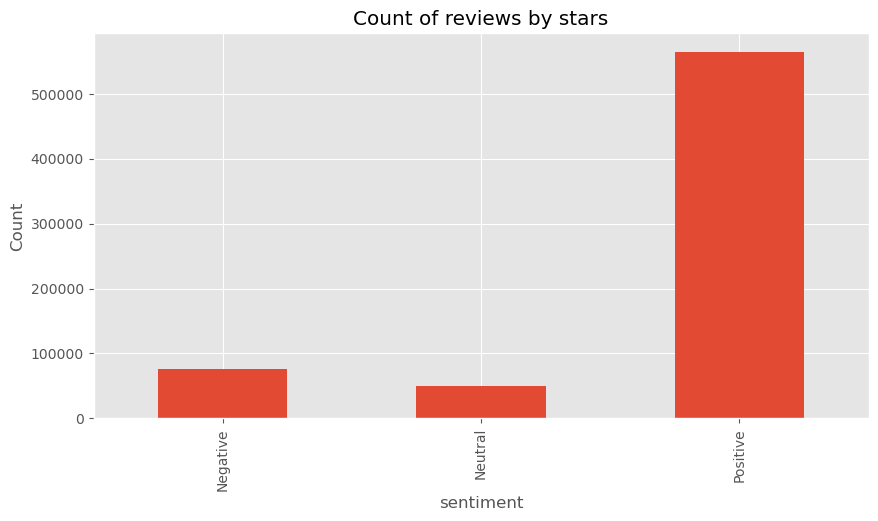

In [94]:
df_1['sentiment'].value_counts().sort_index().plot(kind ='bar', 
                                                       title ='Count of reviews by stars', 
                                                       figsize =(10,5),
                                                       xlabel = 'sentiment',
                                                       ylabel = 'Count')

### Logistic Regression

In [95]:
x = df_1['review']
y = df_1['sentiment']
# Creating Document Term Matrix using TFIDFVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(x)
x
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

In [96]:
logRegr = LogisticRegression()
logRegr.fit(x_train, y_train)
y_pred = logRegr.predict(x_test)
accuracy_score(y_test, y_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8847277038065086

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.73      0.65      0.69     15185
     Neutral       0.57      0.21      0.31     10000
    Positive       0.91      0.98      0.94    113157

    accuracy                           0.88    138342
   macro avg       0.74      0.61      0.65    138342
weighted avg       0.87      0.88      0.87    138342



- under sampling + putting the reviews into 3 catgories only

In [98]:
df_2 = df
df_2['review'] = df_2['review_headline'] + ' ' + df_2['review_body']
df_2 = df_1[['review','star_rating']]
df_2

,review,star_rating
7,doors best movie ever doors one favorite movie...,5
10,definite page turner john grishams rainmaker k...,5
24,didnt want end ive already wear copy book writ...,5
30,interest read would advise people want read bo...,4
40,treasure island book enjoy learn treasure isla...,5
...,...,...
6931105,fun classic solo well coop play worthy followu...,4
6931107,original book much better book original book m...,4
6931121,great first second one past maybe years year a...,1
6931123,perfect home studios clean get job perfect hom...,5


In [99]:
df_2['sentiment'] = df_2.apply(score, axis = 1)
df_2.head()

,review,star_rating,sentiment
7,doors best movie ever doors one favorite movie...,5,Positive
10,definite page turner john grishams rainmaker k...,5,Positive
24,didnt want end ive already wear copy book writ...,5,Positive
30,interest read would advise people want read bo...,4,Positive
40,treasure island book enjoy learn treasure isla...,5,Positive


In [100]:
# Determine the minimum class count
min_class_count = counts.min()

# Undersample each class to the size of the minimum class count
rus = RandomUnderSampler(sampling_strategy={cls: min_class_count for cls in counts.index}, random_state=42)
undersampled_data, undersampled_targets = rus.fit_resample(df_2.drop(columns=['sentiment']), 
                                                           df_2['sentiment'])

# Combine the undersampled data and targets into a new DataFrame
df_2 = pd.concat([pd.DataFrame(undersampled_data), pd.DataFrame(undersampled_targets, 
                                                                         columns=['sentiment'])], axis=1)

In [101]:
df_2.shape

(150855, 3)

In [102]:
counts = df_2['sentiment'].value_counts()
percs = df_2['sentiment'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Negative,50285,33.3%
Neutral,50285,33.3%
Positive,50285,33.3%


In [103]:
x = df_2['review']
y = df_2['sentiment']
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(x)
x

<150855x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 5460729 stored elements in Compressed Sparse Row format>

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

In [105]:
logRegr = LogisticRegression()
logRegr.fit(x_train, y_train)
y_pred = logRegr.predict(x_test)
accuracy_score(y_test, y_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7211560770276093

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.73      0.74      0.73      9986
     Neutral       0.64      0.62      0.63     10025
    Positive       0.79      0.80      0.80     10160

    accuracy                           0.72     30171
   macro avg       0.72      0.72      0.72     30171
weighted avg       0.72      0.72      0.72     30171



- running more models on the one that gave us the best results:

### Random Forest

In [112]:
x = df_1['review']
y = df_1['sentiment']
# Creating Document Term Matrix using TFIDFVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(x)
x
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_y_pred = rfc.predict(x_test)
accuracy_score(y_test, rfc_y_pred)

In [ ]:
print(classification_report(y_test, rfc_y_pred))

### Decision Trees

In [110]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
DTC_y_pred = DTC.predict(x_test)
accuracy_score(y_test, DTC_y_pred)

0.5685260680786185

In [111]:
print(classification_report(y_test, DTC_y_pred))

              precision    recall  f1-score   support

    Negative       0.58      0.57      0.58      9986
     Neutral       0.48      0.48      0.48     10025
    Positive       0.64      0.65      0.64     10160

    accuracy                           0.57     30171
   macro avg       0.57      0.57      0.57     30171
weighted avg       0.57      0.57      0.57     30171



### SGDClassifier

In [107]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
SGDC.fit(x_train, y_train)
SGDC_y_pred = SGDC.predict(x_test)
accuracy_score(y_test, SGDC_y_pred)

0.7105498657651387

In [108]:
print(classification_report(y_test, SGDC_y_pred))

              precision    recall  f1-score   support

    Negative       0.70      0.77      0.73      9986
     Neutral       0.67      0.53      0.60     10025
    Positive       0.75      0.83      0.79     10160

    accuracy                           0.71     30171
   macro avg       0.71      0.71      0.70     30171
weighted avg       0.71      0.71      0.70     30171



### KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as per your requirement

# Train the KNN classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.42242550793808625


In [ ]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
SGDC.fit(x_train, y_train)
SGDC_y_pred = SGDC.predict(x_test)
accuracy_score(y_test, SGDC_y_pred)